In [1]:
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["text.usetex"] = False

In [2]:
from gensim.models import Word2Vec
import json


In [3]:
#!pip install import_ipynb

In [4]:
# from imfunctoolstlib import reload
import nbimporter
from collections import Counter
from functions_readbedfiles import readJsonFile, readFiles2Vector, writeJsonFile, convertMat2document, readJsonFile
import glob
import pandas as pd
import numpy as np
import time
import copy
import gc
import os
from sklearn.decomposition import PCA


Importing Jupyter notebook from functions_readbedfiles.ipynb
Importing Jupyter notebook from functions_ailist.ipynb


In [5]:
# !pip install umap_learn

In [65]:
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
import shutil
from os import walk
import plotly_express as px 
import umap

import colorsys
from operator import itemgetter 
# import umap.plot

In [ ]:
# !pip install umap-learn[plotting]

# Read data

In [19]:
def labels(y_train):
    y_train_y  = []
    for y in y_train:
#         print(y[-1])
        if('rx' in y):
            y_train_y.append('original file')
            continue

        y_name = y.split('_')[-1].split('.')[0]
        if(y_name[-1]!= '0'):
            y_name=y_name+'0'
#             print(y_name)
        y_train_y.append(y_name.replace('rate', '') +' percent')
    return y_train_y


In [20]:
%%time

def plotting(X_train, y_train_y, file_name, plottitle):
    print(len(X_train), len(y_train_y))
    tsnefig_umap = UMAP_plot(X_train, y_train_y, '', nn =100, filename = file_name, plottitle=typ)

#     tsnefig_umap.savefig((file_name), format='png', bbox_inches='tight')
    

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 9.06 µs


In [54]:

def UMAP_plot(data_X, y, title, nn, filename, plottitle):
    ftnsize = 20
    dp = 300
    fontname = 'Times New Roman'
    markers =  {"srx026068": "^", 'srx2614876': "^", 'original file': "^", "add1": "o", "add2": "o", "add3": "o", "add4": "o", "add5": "o", "add6": "o",
               "add7": "o", "add8": "o",
              "add9": "o", 'shift4': "o", 'shift8': "o", 'shift1': "o", 'shift6': "o", 'shift2': "o", 
               'shift7': "o", 'shift5': "o", 'shift9': "o", 'shift3': "o",
              'drop1': "o", 'drop4': "o", 'drop9': "o", 'drop5': "o", 'drop8': "o", 'drop2': "o", 
               'drop7': "o", 'drop6': "o", 'drop3': "o",
              'rate1': "o", 'rate4': "o", 'rate9': "o", 'rate5': "o", 'rate8': "o", 'rate2': "o", 
               'rate7': "o", 'rate6': "o", 'rate3': "o",
              'rate10': "o", 'rate40': "o", 'rate90': "o", 'rate50': "o", 'rate80': "o", 'rate20': "o", 
               'rate70': "o", 'rate60': "o", 'rate30': "o",
               "add10": "o", "add20": "o", "add30": "o", "add40": "o", "add50": "o", "add60": "o",
               "add70": "o", "add80": "o",
              "add90": "o", 'shift40': "o", 'shift80': "o", 'shift10': "o", 'shift60': "o", 'shift20': "o", 
               'shift70': "o", 'shift50': "o", 'shift90': "o", 'shift30': "o",
              'drop10': "o", 'drop40': "o", 'drop90': "o", 'drop50': "o", 'drop80': "o", 'drop20': "o", 
               'drop70': "o", 'drop60': "o", 'drop30': "o",
               '10 percent': "o", '40 percent': "o", '90 percent': "o", '50 percent': "o", '80 percent': "o", '20 percent': "o", 
               '70 percent': "o", '60 percent': "o", '30 percent': "o"}
    
    font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=100)
#     ump = umap.UMAP(n_neighbors=nn)
    
    ump = umap.UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=1000,
     n_neighbors=nn, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)
    
    ump.fit(data_X) 
    ump_data = pd.DataFrame(ump.transform(data_X)) 


    ump_data = pd.DataFrame({'UMAP 1':ump_data[0],
                            'UMAP 2':ump_data[1],
                            title:y})
    

    fig, ax = plt.subplots(figsize=(6,6))
#     plt.fig(figsize=(40, 25))
#     plate = sns.color_palette("coolwarm", n_colors=len(set(y)))


    plate = sns.color_palette("BuGn_r", n_colors= 10)
    # plate= sns.light_palette((210, 90, 60), input="husl", n_colors= 100)
    plate.reverse()
    originalFileColor = 'black'

#     index = [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1099]
#     plate = list(itemgetter(*index)(plate))


    sns.scatterplot(x="UMAP 1", y="UMAP 2",
                  hue=title,
                         style=title,
                    s= 60,
                         palette = plate[0:-1],# sns.color_palette('coolwarm', n_colors=len(set(y))), 
    #                          prop=font,
                         legend=None,
                    edgecolor='black',
                    linewidth=0.2,
                         markers= markers,
    #                 sizes=(100, 900),
                  data=ump_data[ump_data[title] != 'original file'].sort_values(by = title), rasterized=True)
    #     print(ump_data[ump_data[title] == 'original file'].sort_values(by = title)[0:-1])
    sns.scatterplot(x="UMAP 1", y="UMAP 2",
                         style=title,
                        s= 300,
                         color = originalFileColor,
                         markers= markers,
                        legend=None,
                    edgecolor='white',
                    linewidth=1,
    #                 sizes=(100, 900),
                  data=ump_data[ump_data[title] == 'original file'].tail(1)
                   , rasterized=True)

    ax.axis('off')



    fig.savefig(filename, format = 'svg', dpi = dp)


    sns.scatterplot(x="UMAP 1", y="UMAP 2",
                  hue=title,
                         style=title,
                    s= 60,
                         palette = plate[0:-1],# sns.color_palette('coolwarm', n_colors=len(set(y))), 
    #                          prop=font,
#                          legend=None,
                    edgecolor='black',
                    linewidth=0.2,
                         markers= markers,
    #                 sizes=(100, 900),
                  data=ump_data[ump_data[title] != 'original file'].sort_values(by = title), rasterized=True)
    #     print(ump_data[ump_data[title] == 'original file'].sort_values(by = title)[0:-1])
    sns.scatterplot(x="UMAP 1", y="UMAP 2",
                         style=title,
                        s= 300,
                         color = originalFileColor,
                         markers= markers,
#                         legend=None,
                    edgecolor='white',
                    linewidth=1,
    #                 sizes=(100, 900),
                  data=ump_data[ump_data[title] == 'original file'].tail(1)
                   , rasterized=True)

#     plt.legend(prop=font, markerscale=10)
    
    handles, labels = ax.get_legend_handles_labels()
    lgd = plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.5,0.5), fontsize =  ftnsize, markerscale=3)
    text = plt.text(-0.2,1.05, "", transform=ax.transAxes)

    fig.savefig(filename , bbox_extra_artists=(lgd, text), bbox_inches='tight', format = 'svg', dpi = dp)

    return fig

In [55]:
def embedding_avg(model, document):
    listOfWVs= []
    for word in document.split(' '):
        if word in model.wv.vocab:
            listOfWVs.append(model[word])
            
    if(len(listOfWVs) == 0):
#         print('hi')
        return np.zeros([100])
    return np.mean(listOfWVs, axis=0)

def document_embedding_avg(document_Embedding, model):
    document_Embedding_avg = {}
    for file, doc  in document_Embedding.items():
        document_Embedding_avg[file] = embedding_avg(model, doc)
    return document_Embedding_avg
    

In [56]:
def create_data4T_SNE(tdMatrix):
    tdMatrix =  {k.lower(): v for k, v in tdMatrix.items()}
    commonFiles = list(set(tdMatrix.keys())) 

    data_X = []
    y = []
    for name in commonFiles:
        y_1 = name
        if(1==1):
            data_X.append(tdMatrix[name])
            y.append(y_1)
    
    return np.array(data_X), y

In [57]:
bedshiftType = ['add', 'shift', 'drop', 'rate']

In [58]:
typ = bedshiftType[3]
clas_type = 'antibody'
filename = 'SRX026068.05.bed' #'SRX026068.05.bed' # 'SRX2614876.05.bed'


In [59]:
path = '/Users/esestaff/Documents/GitHub/dataregion-embedding/'

In [60]:
path_bedShift = path + 'datasets/bedshiftdataset/*'#.format(clas_type, filename, typ)

In [61]:

path_universe = './representations/{}/'.format(clas_type)
path_output = './umap_plots_similaritydetection/'

In [62]:
#!pip install numpy --upgrade

In [63]:
model = Word2Vec.load(path + "word2vecmodels/word2vec_antibody.model")#.format(clas_type))


./representations/antibody/antibody_universe.bed
Reading universe file: Done 2020-10-20 18:46:45.520885
Reading bed files: Done 2020-10-20 18:47:40.941223
Converting to matrix: Done 2020-10-20 18:47:41.602500


/Users/esestaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


901 901
901 901
./representations/antibody/antibody_feature_5.0_atlas.bed
Reading universe file: Done 2020-10-20 18:49:10.650887
Reading bed files: Done 2020-10-20 18:49:46.533623
Converting to matrix: Done 2020-10-20 18:49:46.728769
901 901
CPU times: user 1min 59s, sys: 4.72 s, total: 2min 4s
Wall time: 3min 10s


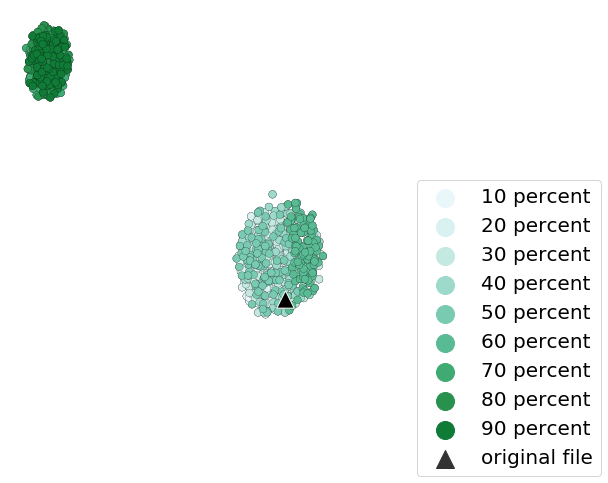

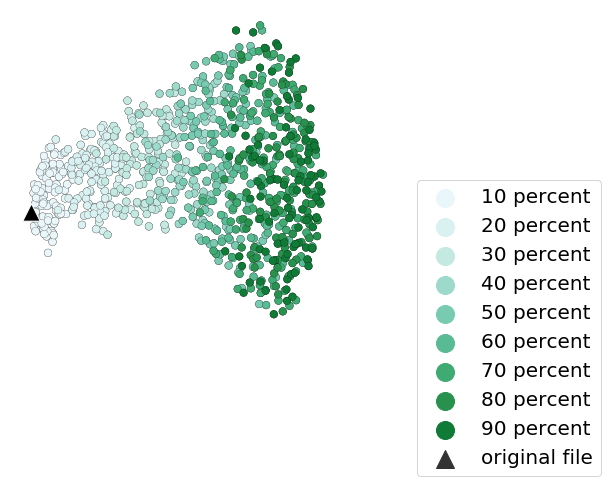

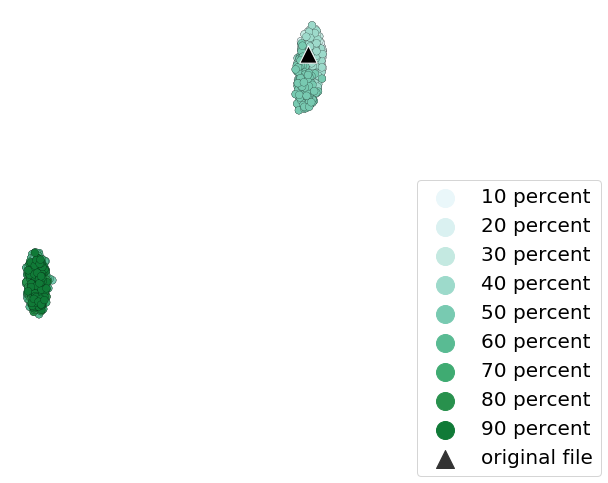

In [64]:
%%time

# Union

path_univ= sorted(glob.glob(path_universe + "*"))[-1:][0]
print(path_univ)
train_files , segmentation_df_train = readFiles2Vector(path_bedShift, path_univ, numberofCores = 4, numOfFiles= 100, PATH = '')
X_train, y_train = create_data4T_SNE(train_files)

y_train_y = labels(y_train)
plotting(X_train, y_train_y, path_output + typ +'_universe0_umap.svg', typ)

# RegionSet2Vec

document_Embedding_train = convertMat2document(train_files, segmentation_df_train)
document_Embedding_avg_train = document_embedding_avg(document_Embedding_train, model)
X_train = list(document_Embedding_avg_train.values())
y_train = list(document_Embedding_avg_train.keys())

y_train_y = labels(y_train)
plotting(X_train, y_train_y, path_output + typ +'_embedding0_umap.svg', typ)

# tf_idf

path_univ= sorted(glob.glob(path_universe + "*"))[-2:-1][0]
print(path_univ)
train_files , segmentation_df_train = readFiles2Vector(path_bedShift, path_univ, numberofCores = 4, numOfFiles= 100, PATH = '')
X_train, y_train = create_data4T_SNE(train_files)

y_train_y = labels(y_train)
plotting(X_train, y_train_y, path_output + typ+'_500-kbp0_umap.svg', typ)


In [33]:
# !conda install -c conda-forge umap-learn